In [1]:
import os 
import shutil  
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import PIL
from PIL import Image
import numpy as np
import pandas as pd
import pickle

from src.dataframe import readImages,createDf,importDfPickle,resizeImages,exportDF,reziseDF

#### Este código mueve todas las fotos de ambas categorías a su respectiva carpeta

In [16]:
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /home/eduardo/Documentos/proyectos/Breast-Cancer-Detector
Directory name is : Breast-Cancer-Detector


In [22]:
dst_folder = 'images'  

os.mkdir(os.path.join(dst_folder, '0')) 
os.mkdir(os.path.join(dst_folder, '1'))  

In [23]:
src_folder = './IDC_regular_ps50_idx5' 

In [24]:
folders = os.listdir(src_folder) 

In [25]:
len(folders)

279

In [26]:
for f in folders:
    f_path = os.path.join(src_folder, f)
    for cl in os.listdir(f_path):
        cl_path = os.path.join(f_path, cl)
        for img in os.listdir(cl_path):
            shutil.copyfile(os.path.join(cl_path, img), os.path.join(dst_folder, cl, img))

#### Explorando con las imágenes

In [2]:
#te lista todos los ficheros de un directorio
images_0 = os.listdir('./images/0')
images_1 = os.listdir('./images/1')

In [3]:
images_0[2]

'12905_idx5_x1251_y151_class0.png'

In [4]:
len(images_0)

135196

In [5]:
len(images_1)

59134

In [6]:
im = Image.open('./images/0/10253_idx5_x1001_y1001_class0.png')
print(im.format, im.size, im.mode)

PNG (50, 50) RGB


In [9]:
img2 = cv2.imread('./images/0/10253_idx5_x1001_y1001_class0.png')
type(img2)
img2.shape

(50, 50, 3)

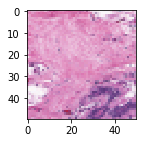

In [36]:
image = mpimg.imread("./images/0/10253_idx5_x1001_y1001_class0.png")
plt.imshow(image)
plt.show()
plt.rcParams['figure.figsize'] = (1, 1)

In [61]:
open_im_0=[Image.open(file) for file in glob.glob('./images/0/*')[:10]]

In [64]:
for im in open_im_0:
    print(im.format, im.size, im.mode)

PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB
PNG (50, 50) RGB


### Creando un dataframe con las imágenes

In [17]:
def readImagesMas(path1,path2):
    #el primero crea dataframe con 200 de una clase y 200 de otra
    #el segubndo crea dataframe con los 1000 de una clase y 1000 de otra
    images=[]
    labels=[]
    paths=[]
    
    path_0 = './images/0/*'
    path_1 = './images/1/*'
    
    for file in glob.glob(path1)[:1000]:
        images.append(cv2.imread(file))
        paths.append(os.path.relpath(file))
        if file in glob.glob(path_0):
            labels.append('benign')
        else:
            labels.append('malignant')
            
    for file in glob.glob(path2)[:1000]:
        images.append(cv2.imread(file))
        paths.append(os.path.relpath(file))
        if file in glob.glob(path_0):
            labels.append('benign')
        else:
            labels.append('malignant')
    
    return images,labels,paths

In [18]:
images,labels,paths=readImagesMas('./images/0/*','./images/1/*')

In [19]:
df_large=createDf(labels, images, paths)

In [21]:
df_large.shape

(2000, 3)

In [ ]:
#exportDF(df_large)

#### Importando el DF ya creado

In [2]:
df=importDfPickle("./output/breast_cancer_df_withoutresize.pkl")

In [3]:
df.head()

,label,image,path
0,benign,"[[[241, 240, 243], [241, 240, 243], [241, 240,...",images/0/10269_idx5_x1101_y901_class0.png
1,benign,"[[[200, 182, 232], [210, 193, 235], [220, 211,...",images/0/9254_idx5_x1551_y1851_class0.png
2,benign,"[[[206, 181, 227], [235, 230, 233], [238, 235,...",images/0/9259_idx5_x2401_y951_class0.png
3,benign,"[[[226, 210, 241], [235, 232, 241], [238, 232,...",images/0/12930_idx5_x951_y1201_class0.png
4,benign,"[[[242, 241, 241], [236, 236, 243], [150, 108,...",images/0/9227_idx5_x901_y1251_class0.png


In [22]:
for im in df_large['image']:
    if im.shape != (50, 50, 3):
        print('¡ojo!', im.shape)

¡ojo! (39, 50, 3)
¡ojo! (39, 50, 3)
¡ojo! (6, 50, 3)
¡ojo! (40, 50, 3)
¡ojo! (27, 50, 3)
¡ojo! (42, 50, 3)
¡ojo! (24, 50, 3)
¡ojo! (36, 50, 3)
¡ojo! (2, 50, 3)
¡ojo! (28, 50, 3)


In [23]:
df_large['image'] = df_large['path'].apply(lambda x: resizeImages(x) if df_large['image'].shape != size else x)

resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resize

resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resize

resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resized image
resize

In [24]:
for image in df_large['image']:
    if image.shape != (50, 50, 3):
        print('ojo',image.shape )
    else:
        print('tamaño ok',image.shape )    

tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok 

tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok 

tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok (50, 50, 3)
tamaño ok 

In [10]:
df.head()

,label,image,path
0,benign,"[[[241, 240, 243], [241, 240, 243], [241, 240,...",images/0/10269_idx5_x1101_y901_class0.png
1,benign,"[[[200, 182, 232], [210, 193, 235], [220, 211,...",images/0/9254_idx5_x1551_y1851_class0.png
2,benign,"[[[206, 181, 227], [235, 230, 233], [238, 235,...",images/0/9259_idx5_x2401_y951_class0.png
3,benign,"[[[226, 210, 241], [235, 232, 241], [238, 232,...",images/0/12930_idx5_x951_y1201_class0.png
4,benign,"[[[242, 241, 241], [236, 236, 243], [150, 108,...",images/0/9227_idx5_x901_y1251_class0.png


#### pipeline para crear dataframe

In [2]:
images,labels,paths=readImages('./images/1/*','./images/0/*')

In [3]:
df=createDf(labels, images, paths)

In [4]:
df.shape

(2000, 3)

In [5]:
df.head()

,label,image,path
0,1,"[[[222, 212, 239], [230, 224, 245], [235, 231,...",images/1/12867_idx5_x1851_y1351_class1.png
1,1,"[[[194, 170, 222], [188, 167, 219], [192, 171,...",images/1/16167_idx5_x2201_y1701_class1.png
2,1,"[[[160, 117, 172], [159, 127, 207], [158, 116,...",images/1/12821_idx5_x1651_y1551_class1.png
3,1,"[[[220, 204, 226], [229, 223, 241], [223, 205,...",images/1/13691_idx5_x3651_y1901_class1.png
4,1,"[[[169, 123, 176], [132, 86, 134], [136, 83, 1...",images/1/14154_idx5_x1801_y1501_class1.png


In [6]:
df['label'].value_counts()

1    1000
0    1000
Name: label, dtype: int64

In [7]:
df=reziseDF(df)

In [8]:
exportDF(df,'breast_cancer_2000m')